# Block Ciphers

Block ciphers are symmetric encryption algorithms that operate on fixed-length groups of bits called blocks. 

They are fundamental to modern cryptography, providing confidentiality by transforming plaintext into ciphertext using a secret key. Unlike stream ciphers that encrypt data bit-by-bit, block ciphers process data in chunks, making them suitable for encrypting large volumes of data securely. Common block cipher algorithms include AES (Advanced Encryption Standard), DES (Data Encryption Standard), and 3DES (Triple DES). 

This notebook focuses on implementing and analyzing AES, one of the most widely used block ciphers today.



## Imports and Setup

We begin by importing the necessary AES implementation and helper functions for analyzing diffusion and confusion. Libraries like NumPy, matplotlib, and seaborn are used for visualization and analysis.


In [1]:
from aes import AES

from diffusion_confusion import flip_bit, hamming_distance
from diffusion_confusion import aes_diffusion, aes_confusion

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

## AES

The **Advanced Encryption Standard (AES)** is a symmetric block cipher established by the U.S. National Institute of Standards and Technology (NIST) in 2001. It supports key sizes of 128, 192, or 256 bits and operates on 128-bit blocks. AES is widely used due to its balance of security, efficiency, and flexibility. The algorithm consists of several rounds of processing, including substitution, permutation, and mixing operations, which ensure strong diffusion and confusion properties. Below, we explore AES's core components step-by-step.

### Add Round Key

The **AddRoundKey** step is the first and simplest operation in AES encryption. In this phase, each byte of the state (the current block of plaintext/ciphertext) is combined with a corresponding byte from the round key using the XOR operation. This step introduces the secret key into the encryption process and is repeated at the beginning, end, and between each main round of AES. The operation is invertible, making it crucial for both encryption and decryption.

The output shows the state after the first Add Round Key operation.

In [2]:
key = bytes.fromhex("000102030405060708090a0b0c0d0e0f")
plaintext = bytes.fromhex("00112233445566778899aabbccddeeff")

state = AES.add_round_key(plaintext, key)
print("State after AddRoundKey:", state.hex())

State after AddRoundKey: 00102030405060708090a0b0c0d0e0f0


### Substitution Bytes

The **SubBytes** transformation is a non-linear substitution step where each byte in the state is replaced with another byte from a predefined substitution table (S-box). This S-box is designed to provide confusion, ensuring that the relationship between the plaintext and ciphertext is complex and resistant to cryptanalysis. The substitution is invertible, allowing decryption to reverse the process using an inverse S-box.

In [3]:
substituted = AES.byte_substitution(state)
print("State after SubBytes:", substituted.hex())

State after SubBytes: 63cab7040953d051cd60e0e7ba70e18c


### Shift Rows

In the **ShiftRows** step, the bytes in each row of the state are shifted cyclically to the left. The number of shifts depends on the row index:
- **Row 0**: No shift.
- **Row 1**: Shifted left by 1 byte.
- **Row 2**: Shifted left by 2 bytes.
- **Row 3**: Shifted left by 3 bytes.

This operation enhances diffusion by spreading the influence of individual bytes across multiple columns.

In [4]:
shifted = AES.shift_rows(substituted)
print("State after ShiftRows:", shifted.hex())

State after ShiftRows: 6353e08c0960e104cd70b751bacad0e7


### Mix Columns

The **MixColumns** transformation operates on each column of the state independently, treating them as polynomials over a finite field. Each column is multiplied by a fixed polynomial matrix, which further mixes the data to ensure diffusion. Like ShiftRows, MixColumns is invertible, allowing decryption to reverse the effect. This step is omitted in the final round of AES for symmetry in the encryption and decryption processes.


In [5]:
mixed = AES.mix_column(shifted)
print("State after MixColumns:", mixed.hex())

State after MixColumns: 5f72641557f5bc92f7be3b291db9f91a


### Key Expansion

**Key Expansion** generates a series of round keys from the initial cipher key. Each round key is derived using a combination of substitutions, rotations, and XOR operations with round constants. The expanded keys ensure that each round of AES uses a unique key, enhancing security. The process varies slightly depending on the key size (128, 192, or 256 bits), but the goal remains the same: to produce enough key material for all encryption rounds.

In [6]:
aes = AES(key)
round_keys = aes.round_keys

for i, rk in enumerate(round_keys):
    print(f"Round key {i}: {rk.hex()}")


Round key 0: 000102030405060708090a0b0c0d0e0f
Round key 1: d6aa74fdd2af72fadaa678f1d6ab76fe
Round key 2: b692cf0b643dbdf1be9bc5006830b3fe
Round key 3: b6ff744ed2c2c9bf6c590cbf0469bf41
Round key 4: 47f7f7bc95353e03f96c32bcfd058dfd
Round key 5: 3caaa3e8a99f9deb50f3af57adf622aa
Round key 6: 5e390f7df7a69296a7553dc10aa31f6b
Round key 7: 14f9701ae35fe28c440adf4d4ea9c026
Round key 8: 47438735a41c65b9e016baf4aebf7ad2
Round key 9: 549932d1f08557681093ed9cbe2c974e
Round key 10: 13111d7fe3944a17f307a78b4d2b30c5


### Encryption

AES encryption involves iteratively applying the four main transformations—AddRoundKey, SubBytes, ShiftRows, and MixColumns—over multiple rounds. The number of rounds depends on the key size:
- **128-bit key**: 10 rounds.
- **192-bit key**: 12 rounds.
- **256-bit key**: 14 rounds.

The final round omits MixColumns for symmetry in decryption. Below, we demonstrate a full AES encryption process, validating our implementation against known test vectors.

In [7]:
aes = AES(key)
ciphertext = aes.encrypt(plaintext)
print("Ciphertext:", ciphertext.hex())


Ciphertext: 69c4e0d86a7b0430d8cdb78070b4c55a


In [8]:
def test_aes():
    key = bytes.fromhex("000102030405060708090a0b0c0d0e0f")
    plaintext = bytes.fromhex("00112233445566778899aabbccddeeff")
    expected_ciphertext = bytes.fromhex("69c4e0d86a7b0430d8cdb78070b4c55a")

    aes = AES(key)
    ciphertext = aes.encrypt(plaintext)

    print("Ciphertext:", ciphertext.hex())
    assert ciphertext == expected_ciphertext, "AES encryption failed!"
    print("✅ AES implementation is correct.")

test_aes()


Ciphertext: 69c4e0d86a7b0430d8cdb78070b4c55a
✅ AES implementation is correct.


In [9]:
key = bytes.fromhex("000102030405060708090a0b0c0d0e0f")
aes = AES(key)
round_keys = aes.round_keys

expected_round_keys = [
    "000102030405060708090a0b0c0d0e0f",
    "d6aa74fdd2af72fadaa678f1d6ab76fe",
    "b692cf0b643dbdf1be9bc5006830b3fe",
    "b6ff744ed2c2c9bf6c590cbf0469bf41",
    "47f7f7bc95353e03f96c32bcfd058dfd",
    "3caaa3e8a99f9deb50f3af57adf622aa",
    "5e390f7df7a69296a7553dc10aa31f6b",
    "14f9701ae35fe28c440adf4d4ea9c026",
    "47438735a41c65b9e016baf4aebf7ad2",
    "549932d1f08557681093ed9cbe2c974e",
    "13111d7fe3944a17f307a78b4d2b30c5"
]

for i, (rk, expected) in enumerate(zip(round_keys, expected_round_keys)):
    assert rk.hex() == expected, f"Round key {i} mismatch: got {rk.hex()}, expected {expected}"
print("✅ Key expansion test passed!")


✅ Key expansion test passed!


In [10]:
plaintext = bytes.fromhex("00112233445566778899aabbccddeeff")
aes = AES(key)
ciphertext = aes.encrypt(plaintext)

expected_ciphertext = "69c4e0d86a7b0430d8cdb78070b4c55a"
assert ciphertext.hex() == expected_ciphertext, \
    f"Encryption failed: got {ciphertext.hex()}, expected {expected_ciphertext}"
print("✅ Full encryption test passed!")

✅ Full encryption test passed!


In [11]:
def test_aes():
    key = bytes.fromhex("000102030405060708090a0b0c0d0e0f")
    plaintext = bytes.fromhex("00112233445566778899aabbccddeeff")
    expected_ciphertext = bytes.fromhex("69c4e0d86a7b0430d8cdb78070b4c55a")

    aes = AES(key)
    ciphertext = aes.encrypt(plaintext)

    print("Ciphertext:", ciphertext.hex())
    assert ciphertext == expected_ciphertext, "AES encryption failed!"
    print("✅ AES implementation is correct.")

test_aes()


Ciphertext: 69c4e0d86a7b0430d8cdb78070b4c55a
✅ AES implementation is correct.


In [12]:
# Test SubBytes
state = bytes.fromhex("00102030405060708090a0b0c0d0e0f0")
substituted = AES.byte_substitution(state)
expected_substituted = "63cab7040953d051cd60e0e7ba70e18c"
assert substituted.hex() == expected_substituted, \
    f"SubBytes failed: got {substituted.hex()}, expected {expected_substituted}"

# Test ShiftRows
shifted = AES.shift_rows(substituted)
expected_shifted = "6353e08c0960e104cd70b751bacad0e7"
assert shifted.hex() == expected_shifted, \
    f"ShiftRows failed: got {shifted.hex()}, expected {expected_shifted}"

# Test MixColumns
mixed = AES.mix_column(shifted)
expected_mixed = "5f72641557f5bc92f7be3b291db9f91a"
assert mixed.hex() == expected_mixed, \
    f"MixColumns failed: got {mixed.hex()}, expected {expected_mixed}"

print("✅ Component tests passed!")

✅ Component tests passed!


In [13]:
# Invalid key size (should raise an error if you add checks)
try:
    AES(bytes.fromhex("00"))  # 1-byte key
    print("❌ No error for invalid key size!")
except ValueError:
    print("✅ Invalid key size handled correctly.")

✅ Invalid key size handled correctly.


## AES Diffusion and Confusion

**Diffusion** and **confusion** are two fundamental principles in block cipher design, introduced by Claude Shannon. Diffusion spreads the influence of individual plaintext/ciphertext bits over the entire output, while confusion obscures the relationship between the key and ciphertext. AES achieves these properties through its iterative round structure and operations like SubBytes (confusion) and MixColumns (diffusion). Below, we analyze these properties experimentally by measuring how small changes in input or key propagate through the cipher.

### Step 1: Monte Carlo Setup in Notebook

To analyze AES's diffusion and confusion properties, we conduct a **Monte Carlo simulation**:
1. **Generate random plaintexts and keys**.
2. **Flip a single bit** in either the plaintext or key.
3. **Encrypt both original and modified inputs**.
4. **Compute the Hamming distance** (number of differing bits) between the two ciphertexts.

This process is repeated for multiple rounds of AES to observe how differences propagate. The results help quantify the algorithm's resistance to differential cryptanalysis.

In [14]:
# Configure plot style
sns.set(style="whitegrid")

# Run diffusion/confusion simulations for each round (0 to 10)
num_trials = 100
rounds = range(11)
diffusion_results = []
confusion_results = []

for r in rounds:
    print(f"Running round {r}...")
    diffusion = [aes_diffusion(num_rounds=r) for _ in range(num_trials)]
    confusion = [aes_confusion(num_rounds=r) for _ in range(num_trials)]
    diffusion_results.append(diffusion)
    confusion_results.append(confusion)


Running round 0...
Running round 1...
Running round 2...
Running round 3...
Running round 4...
Running round 5...
Running round 6...
Running round 7...
Running round 8...
Running round 9...
Running round 10...


### Step 2: Plot the Results (Boxplots)

Using the simulation data, we visualize diffusion and confusion via **boxplots**:
- **X-axis**: Number of AES rounds (0 to 10).
- **Y-axis**: Hamming distance between ciphertexts.

**Key observations**:
- **Diffusion**: The Hamming distance increases with rounds, showing how differences spread.
- **Confusion**: The distribution of distances becomes uniform, indicating no exploitable patterns.

The boxplots below show how the Hamming distance changes with AES rounds. For diffusion (left), expect increasing distance with more rounds. For confusion (right), expect randomness (no clear trend).

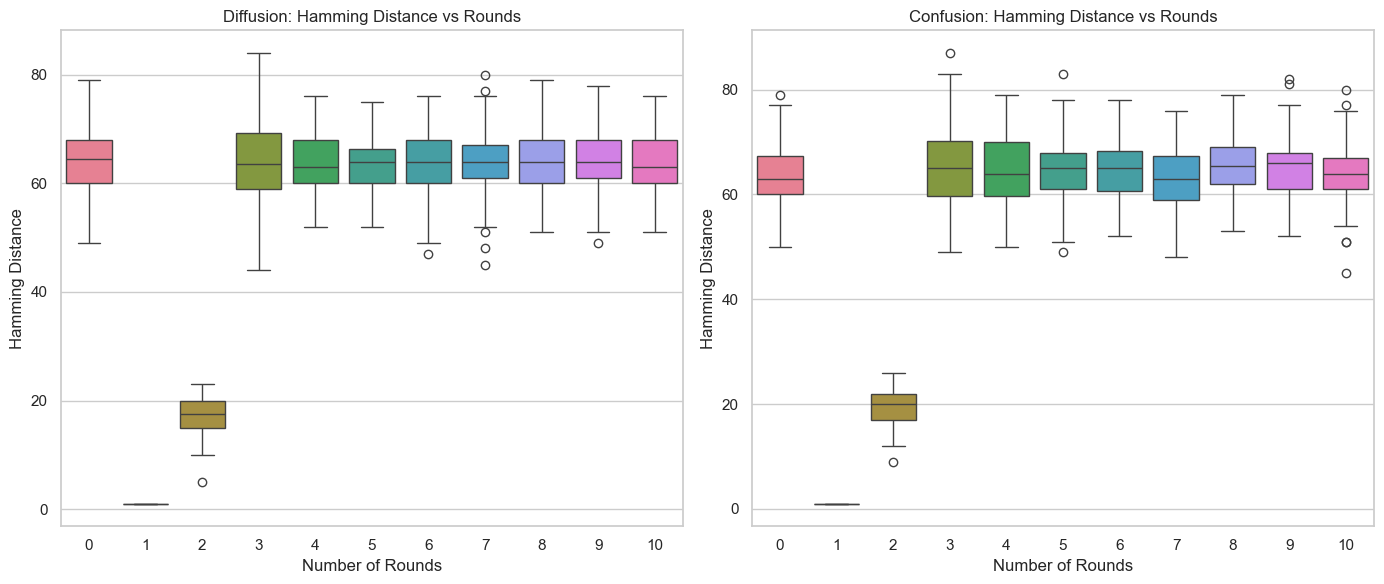

In [15]:
# Convert to NumPy arrays
diffusion_array = np.array(diffusion_results)
confusion_array = np.array(confusion_results)

# Plotting
plt.figure(figsize=(14, 6))

# Diffusion plot
plt.subplot(1, 2, 1)
sns.boxplot(data=diffusion_array.T)
plt.title("Diffusion: Hamming Distance vs Rounds")
plt.xlabel("Number of Rounds")
plt.ylabel("Hamming Distance")

# Confusion plot
plt.subplot(1, 2, 2)
sns.boxplot(data=confusion_array.T)
plt.title("Confusion: Hamming Distance vs Rounds")
plt.xlabel("Number of Rounds")
plt.ylabel("Hamming Distance")

plt.tight_layout()
plt.show()


### Step 3: Optional – Distribution Histogram (Single Round)

For deeper insight, we examine the **bit-flip distribution** after a single round:
- **Histogram**: Shows the frequency of Hamming distances.
- **Expected outcome**: A binomial distribution centered near 50% bit difference, indicating ideal confusion.

The histogram shows the distribution of bit-flips after one round. Ideally, it should resemble a binomial distribution centered near 50%, indicating strong confusion.

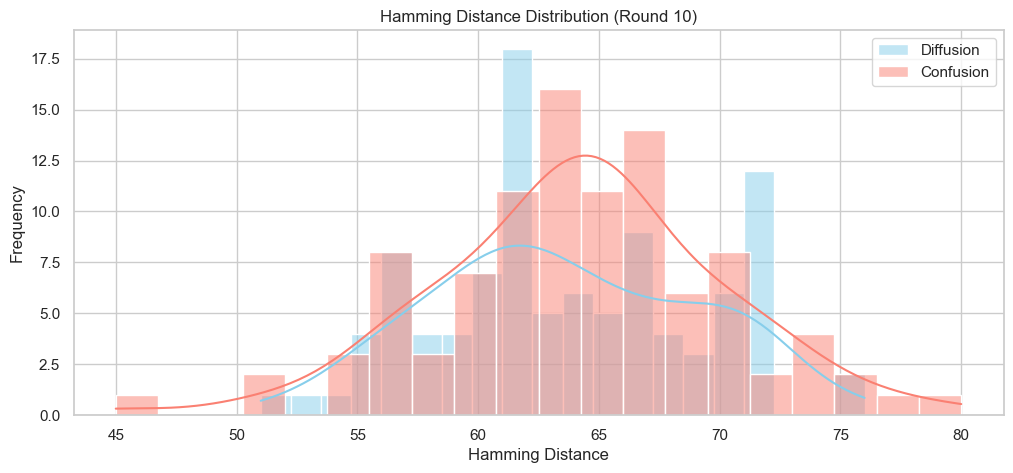

In [16]:
plt.figure(figsize=(12, 5))

sns.histplot(diffusion_array[10], bins=20, kde=True, color="skyblue", label="Diffusion")
sns.histplot(confusion_array[10], bins=20, kde=True, color="salmon", label="Confusion")
plt.title("Hamming Distance Distribution (Round 10)")
plt.xlabel("Hamming Distance")
plt.ylabel("Frequency")
plt.legend()
plt.show()


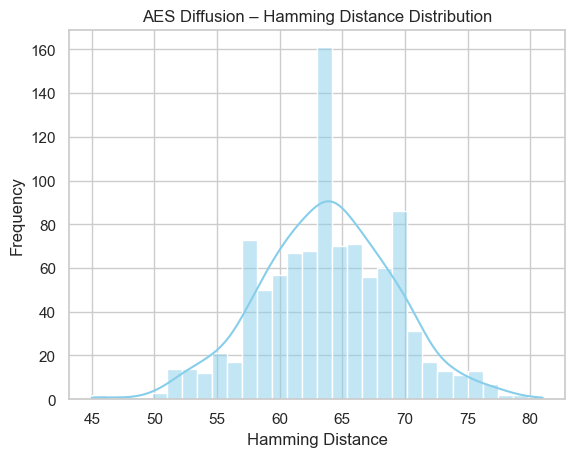

In [17]:
# Run diffusion test 1000 times
diffusion_distances = [aes_diffusion() for _ in range(1000)]

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(diffusion_distances, kde=True, bins=30, color='skyblue')
plt.title("AES Diffusion – Hamming Distance Distribution")
plt.xlabel("Hamming Distance")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


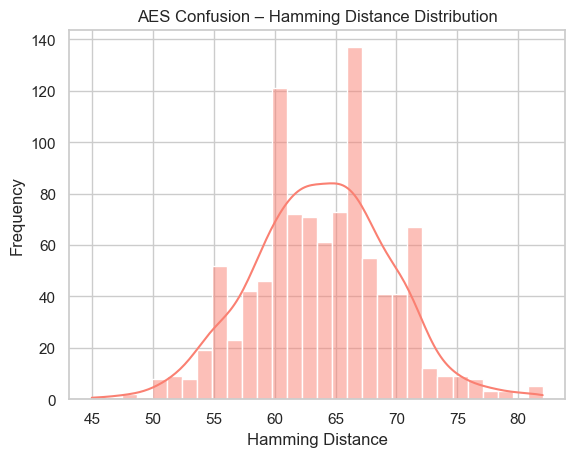

In [18]:
# Run confusion test 1000 times
confusion_distances = [aes_confusion() for _ in range(1000)]

# Plotting
sns.histplot(confusion_distances, kde=True, bins=30, color='salmon')
plt.title("AES Confusion – Hamming Distance Distribution")
plt.xlabel("Hamming Distance")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## Conclusion

This notebook explored the **Advanced Encryption Standard (AES)** through hands-on implementation and analysis of its core components:  
- **AddRoundKey**, **SubBytes**, **ShiftRows**, and **MixColumns**, which together form the iterative rounds of AES.  
- **Key Expansion**, ensuring each round uses a unique key for enhanced security.  

We validated our implementation by comparing encryption results with standard test vectors, confirming correctness.  

### Key Findings:  
1. **Diffusion and Confusion**:  
   - Experimental analysis (via Monte Carlo simulations and boxplots) demonstrated AES’s strong diffusion (bit changes propagate widely) and confusion (output appears random).  
   - The Hamming distance between ciphertexts increased with each round, showing how AES rapidly obscures input patterns.  

2. **Security Properties**:  
   - Even a single-bit change in the plaintext or key produced vastly different ciphertexts after just a few rounds, highlighting AES’s resistance to differential cryptanalysis.  
   - The histogram of bit-flip distributions confirmed near-ideal confusion, with outputs behaving statistically random.  

3. **Practical Implications**:  
   - AES’s design ensures efficient yet secure encryption, making it suitable for applications ranging from file encryption to secure communications.  
   - Understanding these principles helps in evaluating cryptographic strength and designing robust systems.  

### Future Work:  
- Extend the analysis to **decryption** and benchmark performance.  
- Explore side-channel attacks (e.g., timing analysis) and countermeasures.  
- Compare AES with other block ciphers (e.g., ChaCha20) for speed and security trade-offs.  

AES remains a cornerstone of modern cryptography, and this project underscores its mathematical elegance and practical resilience.  